### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import torchvision
from torchvision import datasets, transforms

`DataLoader` module is used to pass data as batches. It is very efficient in creating batches and iterating through the batches during training

In [3]:
from torch.utils.data import DataLoader

Listing the contents of `datasets` module

In [4]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

We can also see the contents of the `MNIST` class

In [5]:
help(datasets.MNIST)

Help on class MNIST in module torchvision.datasets.mnist:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  MNIST(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
 |          and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in a PIL image
 |          and returns a

### Loading the dataset

In [6]:
train_data = datasets.FashionMNIST('.data', train = True, download = True)

#### Parameters Explanation

1. **'.data'**:
   - This parameter specifies the directory where the dataset will be stored. If the directory does not exist, it will be created automatically. This is useful for organizing datasets and ensuring that they are easily accessible for future use.

2. **`train=True`**:
   - This boolean parameter indicates that the training dataset should be loaded. When set to `True`, it fetches the training set, which consists of 60,000 images used for training machine learning models. If set to `False`, it would load the test dataset, which contains 10,000 images used for evaluating model performance.

3. **`download=True`**:
   - This parameter allows the function to download the dataset if it is not already present in the specified directory. Setting this to `True` ensures that you have the latest version of the dataset, facilitating easy access without manual downloading.

In [7]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: .data
    Split: Train

In [8]:
len(train_data)

60000

In [9]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

- `train_data.data` -> Features
- `train_data.targets` -> Labels
- `train_data.classes` -> Name of the classes
- `train_data.class_to_idx` -> has the corresponding relation between `.classes` and `.targets`

In [10]:
train_data.data.shape

torch.Size([60000, 28, 28])

The train data has 60000 images of 28x28 dimension

In [11]:
train_data.targets.shape

torch.Size([60000])

In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

`train_data.targets` contains the indices of the objects present in `train_data.classes`

In [14]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

- `train_data.data` - has images in the formatof arrays
- `train_data` - has images in the format of PIL 

In [15]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

`PIL.Image.Image image mode=L size=28x28`: This part indicates that the first element is an image object created using the Python Imaging Library (PIL), which is now maintained under the Pillow library. Here's a breakdown:

- `mode=L`: This means the image is in "L" mode, which stands for "Luminance." It represents a grayscale image, where each pixel is a single intensity value.
- `size=28x28`: This indicates the dimensions of the image, which is 28 pixels wide and 28 pixels tall. This size is commonly used for datasets like MNIST, which contains images of handwritten digits.

If we index it to next level we can see the actaul image in a smaller size

In [16]:
train_data[0][0]

To view it as a full size image, we can use `matplotlib.pyplot`

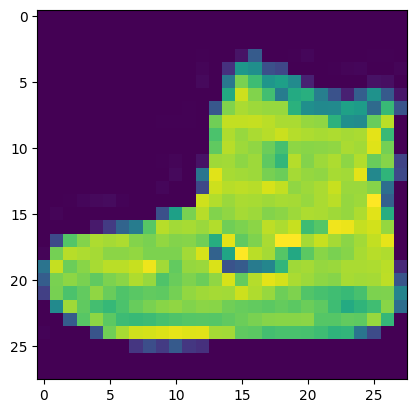

In [17]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0][0])

### Let us see how we can transform this `PIL` image format to `Pytorch.Tensor`

In [18]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [19]:
tensor_transform = transforms.ToTensor()

We can also compose multiple transformations into a single transforms object by using `transforms.Compose`

In [20]:
composed_transform = transforms.Compose((transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))))

- `transforms.Normalize(mean=(0), std=(1))` - will normaize each pixels with `mean=(0)` and `std=(1)`, since we have only single channel we have passes a tuple of only single element
- For three or multiple channels we should pass `mean=(0, 0, 0)` and `std=(1, 1, 1)`

In [21]:
train_data_tensor = datasets.FashionMNIST('.data', train = True, transform=tensor_transform)

In [22]:
train_data_tensor[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Now, the data is loaded a `Tensor`

In [23]:
train_data_normalized = datasets.FashionMNIST('.data', train = True, transform=composed_transform)

In [24]:
train_data_normalized[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

### Now, let us explore with `CIFAR10` dataset which has images containing 3 channels

In [25]:
cifar_train = datasets.CIFAR10('.CIFAR10', train = True, download = True)

Files already downloaded and verified


In [26]:
cifar_train.data.shape

(50000, 32, 32, 3)

In [27]:
composed_transform_cifar = transforms.Compose((transforms.ToTensor(), transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))))

In [28]:
cifar_train_normalized = datasets.CIFAR10('.CIFAR10', train = True, transform = composed_transform_cifar)

In [29]:
cifar_train_normalized[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [30]:
type(cifar_train_normalized[0][0])

torch.Tensor

In [31]:
type(cifar_train_normalized.data)

numpy.ndarray

Remember that `.data` is not transformed and still in the format of `numpy array`

In [32]:
cifar_train_normalized.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Using `DataLoader` for training

In [33]:
train_iter = DataLoader(cifar_train_normalized, batch_size=100, shuffle=True)

`batch_size=100` means each batch contains 100 data points

In [34]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

We can iterate through these batches in a loop

In [35]:
for features, labels in train_iter:
    print(labels)
    break

tensor([0, 8, 6, 6, 8, 3, 4, 9, 5, 4, 2, 9, 5, 6, 6, 9, 4, 1, 1, 4, 0, 5, 8, 2,
        3, 6, 7, 4, 7, 0, 9, 9, 6, 5, 1, 7, 7, 7, 5, 2, 4, 8, 9, 2, 4, 7, 4, 1,
        8, 7, 3, 1, 5, 3, 3, 4, 7, 8, 2, 5, 5, 3, 3, 4, 0, 3, 4, 8, 8, 6, 3, 2,
        3, 8, 7, 2, 0, 7, 7, 4, 0, 9, 2, 3, 5, 8, 6, 0, 2, 9, 6, 0, 6, 4, 0, 1,
        3, 1, 5, 0])


### Convolutional Neural Networks

`nn.Conv2d(in_channels, out_channels, kernel_size)`

`kernel_size` -> This could be an integer, if the kerenl is a square kernel or a tuple incase of non-square kernel
`out_channels` -> Output channels also corresponds to number of kernels to be used 

In [36]:
x = train_iter[0][0]
x.shape

TypeError: 'DataLoader' object is not subscriptable

`DataLoader` is not sub-scriptable, so we can use it under `iter` or for loop to access an element

In [37]:
iterator = iter(train_iter)
batch0 = next(iterator)
features, labels = batch0

In [38]:
x = features[0]
x.shape

torch.Size([3, 32, 32])

In [39]:
conv = nn.Conv2d(3, 6, 5)

In [40]:
conv.weight.shape

torch.Size([6, 3, 5, 5])

- 6 -> Number of kernels
- (3, 5 ,5) -> Dimension of each kernel

In [41]:
x1 = conv(x)
x1.shape

torch.Size([6, 28, 28])

#### Always remember that the shape of the input passing into the convolutional network if of the for (N, C, H, W)

- N -> Number of batches
- C -> Number of Channels
- H -> Height of the Image
- W -> Width of the Image

`nn.MaxPool2d(kernel_size, stride)`

In [42]:
pooling = nn.MaxPool2d(2, 2)

In [43]:
x2 = pooling(x1)
x2.shape

torch.Size([6, 14, 14])

### Defining CNN

Checking for output from the convolutional layers

In [44]:
x1 = nn.Conv2d(3, 6, 5)(x)
x2 = nn.MaxPool2d(2, 2)(x1)
x3 = nn.Conv2d(6, 6, 5)(x2)
x4 = nn.MaxPool2d(2, 2)(x3)
x4.shape

torch.Size([6, 5, 5])

In [45]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 6, 5)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(6*5*5, 80)
    self.fc2 = nn.Linear(80, 20)
    self.fc3 = nn.Linear(20, 10)
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = x.view(-1, 6*5*5) # x.Flatten()
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    
    return x

In [46]:
cnn = CNN().to('cuda')
output = cnn(x.to('cuda'))
output

tensor([[ 0.0083, -0.2148, -0.0258, -0.0483,  0.1031, -0.0943,  0.1506, -0.0182,
          0.0931,  0.1789]], device='cuda:0', grad_fn=<AddmmBackward0>)

We can also pass in batch of inputs

In [47]:
batch_output = cnn(features.to('cuda'))
batch_output.shape

torch.Size([100, 10])

### Training CNN

`NOTE` : Always remember that `CrossEntropyLoss` does the **softmax** operation on the final layer before calculating loss, so do not add the softmax layer to the forward propagation of the model

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.9)

1 epoch is the pass through the entire pass

In [49]:
for epoch in range(10):

  total_corr_pred = 0

  for features, labels in train_iter:
    optimizer.zero_grad()
    outputs = cnn(features.to('cuda'))
    loss = criterion(outputs, labels.to('cuda'))
    loss.backward()
    optimizer.step()

    corr_pred_vec = torch.argmax(outputs, axis=1) == labels.to('cuda')
    corr_pred = torch.count_nonzero(corr_pred_vec)

    total_corr_pred += corr_pred

  print('Epoch :', epoch+1, "Accuracy :", total_corr_pred.item()/50000)


Epoch : 1 Accuracy : 0.2645
Epoch : 2 Accuracy : 0.44216
Epoch : 3 Accuracy : 0.4989
Epoch : 4 Accuracy : 0.53236
Epoch : 5 Accuracy : 0.5553
Epoch : 6 Accuracy : 0.57078
Epoch : 7 Accuracy : 0.58256
Epoch : 8 Accuracy : 0.59396
Epoch : 9 Accuracy : 0.6046
Epoch : 10 Accuracy : 0.60844


#### Evaluation

In [50]:
test_data = datasets.CIFAR10('.CIFAR10/', train = False, download = True, transform = composed_transform_cifar)
test_data

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: .CIFAR10/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [51]:
test_data.data.shape

(10000, 32, 32, 3)

In [52]:
test_iter = DataLoader(test_data, shuffle=False, batch_size=100)

#### For only forward pass, where we do not need to compute any gradients we can use either `torch.no_grad()` or `cnn.eval()`

In [53]:
cnn.eval()

total_corr_pred = 0

for features, labels in test_iter:
  test_output = cnn(features.to('cuda'))
  corr_preds_vec = torch.argmax(test_output, axis=1) == labels.to('cuda')
  corr_preds = torch.count_nonzero(corr_preds_vec)
  total_corr_pred += corr_preds

print("Test Accuracy :", total_corr_pred.item()/10000)

Test Accuracy : 0.5945


## Pre-trained Models

There are many pre-trained models in pytorch under `torchvision.models` which are used for computer vision tasks

In [54]:
from torchvision import models

dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'